# Template Notebook

## Setup

### Standard library imports

In [0]:
%load_ext autoreload

In [0]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [0]:
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import covariance, metrics

## System

In [4]:
A = np.random.rand(10)
A

array([0.9246156 , 0.83949678, 0.63168928, 0.85417813, 0.94756776,
       0.57858293, 0.952458  , 0.13494603, 0.96674002, 0.24899226])

In [0]:
x = stats.multivariate_normal.rvs(cov=np.eye(10), size=1000)

In [0]:
cov_matrix = covariance.empirical_covariance(x)

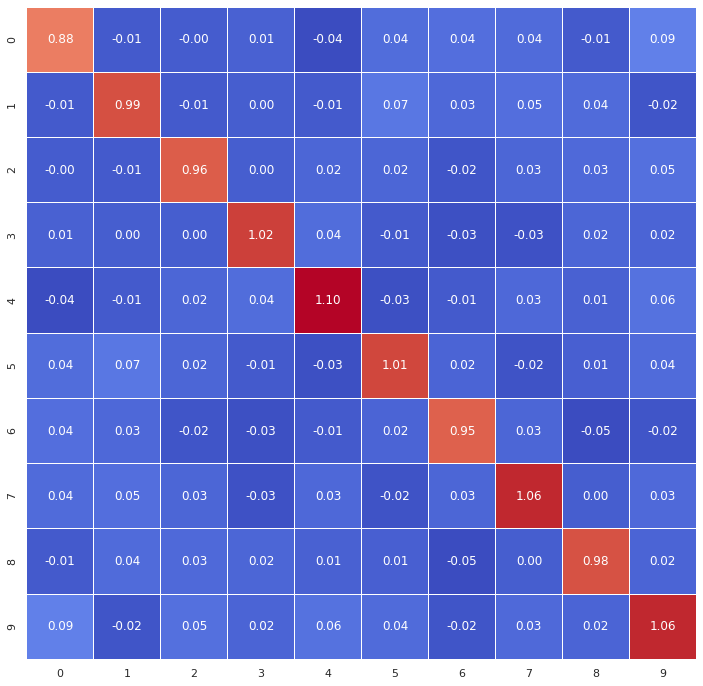

In [11]:
plt.figure(figsize=[12, 12])
_ = sns.heatmap(cov_matrix, annot=True, fmt=".2f", cbar=False, linewidth=0.1, cmap="coolwarm")

In [0]:
y = np.vectorize(miso_system, signature="(n)->()")(x)

## Least Squares

In [0]:
class LeastSquaresEstimator:
    """

    """
    def __init__(self):
        self.coefficients = None

    def fit(self, x: np.array, y: np.array) -> None:
        """

        :param x:
        :param y:
        :return:
        """
        self.coefficients = np.linalg.inv(x.T @ x) @ x.T @ y

    def _estimate(self, x):
        return x.T @ self.coefficients

    def predict(self, x):
        if self.coefficients is None:
            raise NotFittedError

        return np.vectorize(self._estimate)(x)

In [0]:
estimator = LeastSquaresEstimator()

In [0]:
estimator.fit(x, y)

In [21]:
estimator.coefficients

array([0.89022162, 0.80744382, 0.55422138, 0.79115316, 0.92562244,
       0.57107757, 0.9717038 , 0.19106562, 0.95088255, 0.27548354])

In [22]:
A

array([0.9246156 , 0.83949678, 0.63168928, 0.85417813, 0.94756776,
       0.57858293, 0.952458  , 0.13494603, 0.96674002, 0.24899226])

In [0]:
estimator_cov = np.power(np.std(x), 2) * np.linalg.inv(x.T @ x)

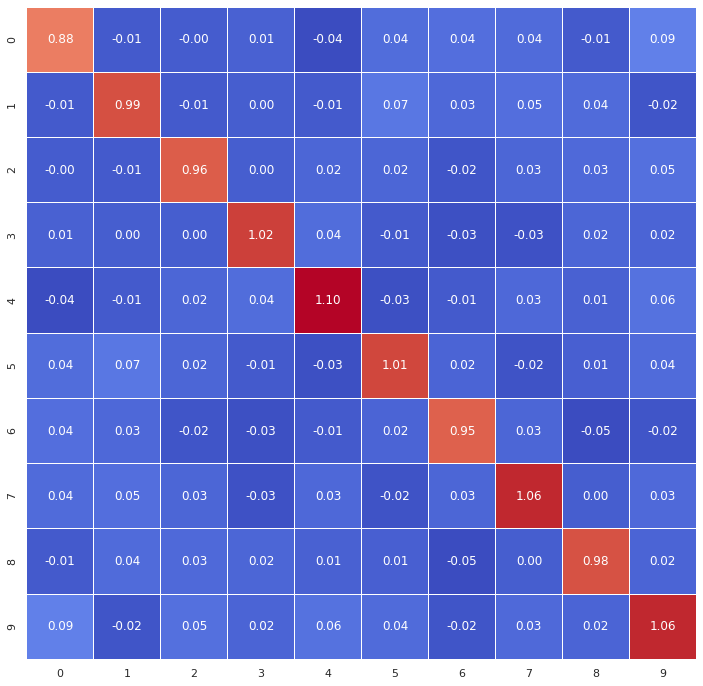

In [24]:
plt.figure(figsize=[12, 12])
_ = sns.heatmap(cov_matrix, annot=True, fmt=".2f", cbar=False, linewidth=0.1, cmap="coolwarm")

In [26]:
A

array([0.9246156 , 0.83949678, 0.63168928, 0.85417813, 0.94756776,
       0.57858293, 0.952458  , 0.13494603, 0.96674002, 0.24899226])

In [31]:
print(f"MSE: {metrics.mean_squared_error(y_true=A, y_pred=estimator.coefficients):.2E}")
print(f"MAE: {metrics.mean_absolute_error(y_true=A, y_pred=estimator.coefficients):.2E}")
print(f"MAXE: {metrics.max_error(y_true=A, y_pred=estimator.coefficients):.2E}")

MSE: 1.72E-03
MAE: 3.54E-02
MAXE: 7.75E-02


In [0]:
def miso_system(X, A, var = 1.0):
    return X.T @ A + var*stats.norm.rvs(size=1, scale=1, loc=0)

In [0]:
results = []
for var in np.linspace(0, 100, 1000):
    x = stats.multivariate_normal.rvs(cov=np.eye(10), size=1000)
    y = np.apply_along_axis(miso_system, 1, x, var)
    estimator = LeastSquaresEstimator()
    estimator.fit(x, y)
    results.append([var,
                    metrics.mean_squared_error(y_true=A, y_pred=estimator.coefficients),
                    metrics.mean_absolute_error(y_true=A, y_pred=estimator.coefficients),
                    metrics.max_error(y_true=A, y_pred=estimator.coefficients)
                    ])

results_df = pd.DataFrame.from_records(results, columns=["Var", "MSE", "MAE", "MAXE"])

In [42]:
# results_df

,Var,MSE,MAE,MAXE
0,0.01,1.253359e-07,0.000324,0.000492
1,0.10,1.075464e-05,0.002762,0.006224
2,0.20,2.082642e-05,0.003450,0.010355
3,0.50,1.021738e-04,0.008889,0.018666
4,1.00,5.988150e-04,0.020477,0.038044
5,2.00,6.800812e-03,0.044422,0.249440
6,5.00,2.484927e-02,0.127421,0.319986
7,10.00,1.155887e-01,0.281968,0.756266
8,20.00,2.255701e-01,0.391710,1.003057
9,100.00,4.318510e+00,1.122590,6.198770


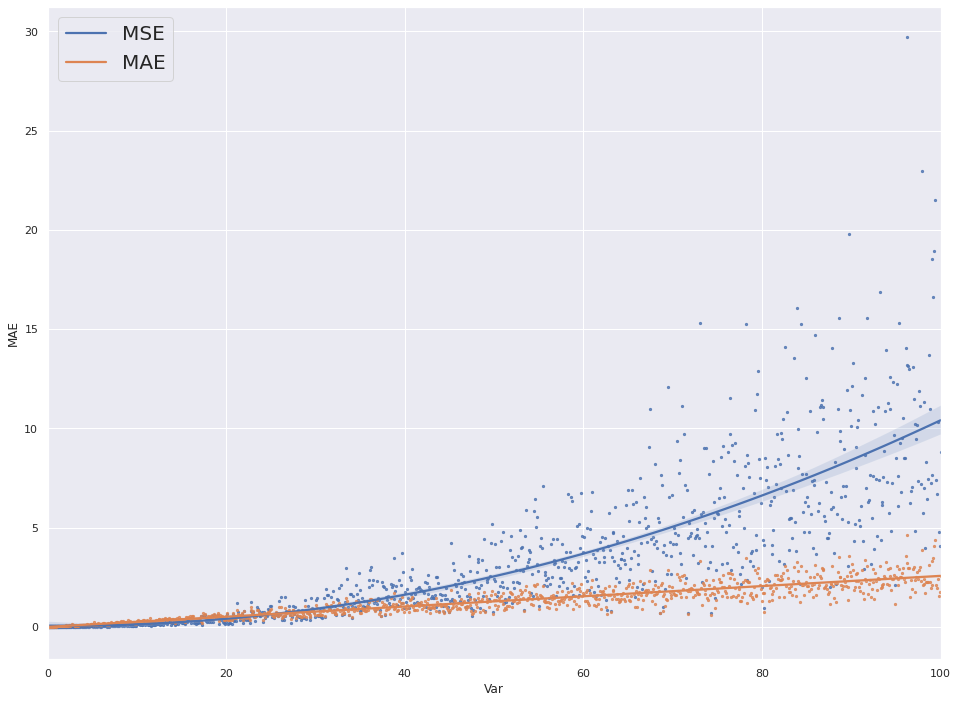

In [54]:
plt.figure(figsize=[16, 12])
_ = sns.regplot(results_df["Var"], results_df["MSE"], scatter_kws={"s": 5}, order=2)
_ = sns.regplot(results_df["Var"], results_df["MAE"], scatter_kws={"s": 5})

_ = plt.legend(["MSE", "MAE"], prop={"size": 20})

In [0]:
results = []
for N in np.linspace(200, 10_000, 50):
    mse = []
    mae = []
    for _ in range(10):
        L = int(N / 10)
        a = np.random.rand(L)
        x = stats.multivariate_normal.rvs(cov=np.eye(L), size=int(N))
        y = np.apply_along_axis(miso_system, 1, x, a)
        estimator = LeastSquaresEstimator()
        estimator.fit(x, y)
        mse.append(metrics.mean_squared_error(y_true=a, y_pred=estimator.coefficients))
        mae.append(metrics.mean_absolute_error(y_true=a, y_pred=estimator.coefficients))
        
    results.append([N, np.mean(mse), np.mean(mae)])

results_df = pd.DataFrame.from_records(results, columns=["N", "MSE", "MAE"])

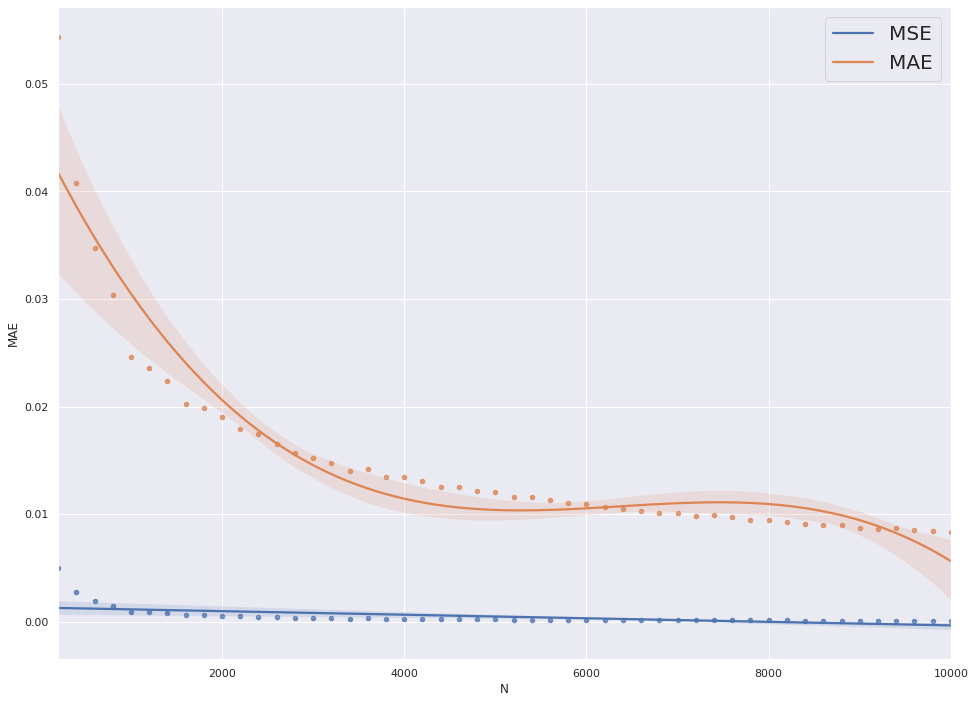

In [90]:
plt.figure(figsize=[16, 12])
_ = sns.regplot(results_df["N"], results_df["MSE"], scatter_kws={"s": 20}, order=1)
_ = sns.regplot(results_df["N"], results_df["MAE"], scatter_kws={"s": 20}, order=3)

_ = plt.legend(["MSE", "MAE"], prop={"size": 20})